<a href="https://colab.research.google.com/github/dmiller2000/Customer_Focus/blob/main/prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Work 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [ ]:
# Load the data from your Google Drive
data = pd.read_csv('/content/drive/MyDrive/coupon-acceptance-profile_24Feb2025_1740378635419.csv')

# Check that it loaded properly
print(f"Data loaded successfully with {data.shape[0]} rows and {data.shape[1]} columns")
data.head()

Data loaded successfully with 12684 rows and 27 columns


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,AVERAGE Column 1
0,NO URGENT PLACE,ALONE,SUNNY,55,2PM,RESTAURANT(<20),1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,0,0,0,1,1,0.568433
1,NO URGENT PLACE,FRIEND(S),SUNNY,80,10AM,COFFEE HOUSE,2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,0,0,0,1,0,0.568433
2,NO URGENT PLACE,FRIEND(S),SUNNY,80,10AM,CARRY OUT & TAKE AWAY,2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,1,0.568433
3,NO URGENT PLACE,FRIEND(S),SUNNY,80,2PM,COFFEE HOUSE,2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,0,0.568433
4,NO URGENT PLACE,FRIEND(S),SUNNY,80,2PM,COFFEE HOUSE,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,0,0.568433


In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [ ]:
# Example for handling missing categorical data
data['car'] = data['car'].fillna('Unknown')

# Example for handling missing numerical data (if applicable)
# data['numerical_column'] = data['numerical_column'].fillna(data['numerical_column'].median())

3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
# Calculate percentage of accepted coupons
acceptance_rate = data['Y'].mean() * 100
print(f"Overall coupon acceptance rate: {acceptance_rate:.2f}%")

Overall coupon acceptance rate: 56.84%


4. What proportion of the total observations chose to accept the coupon?



5. Use a bar plot to visualize the `coupon` column.

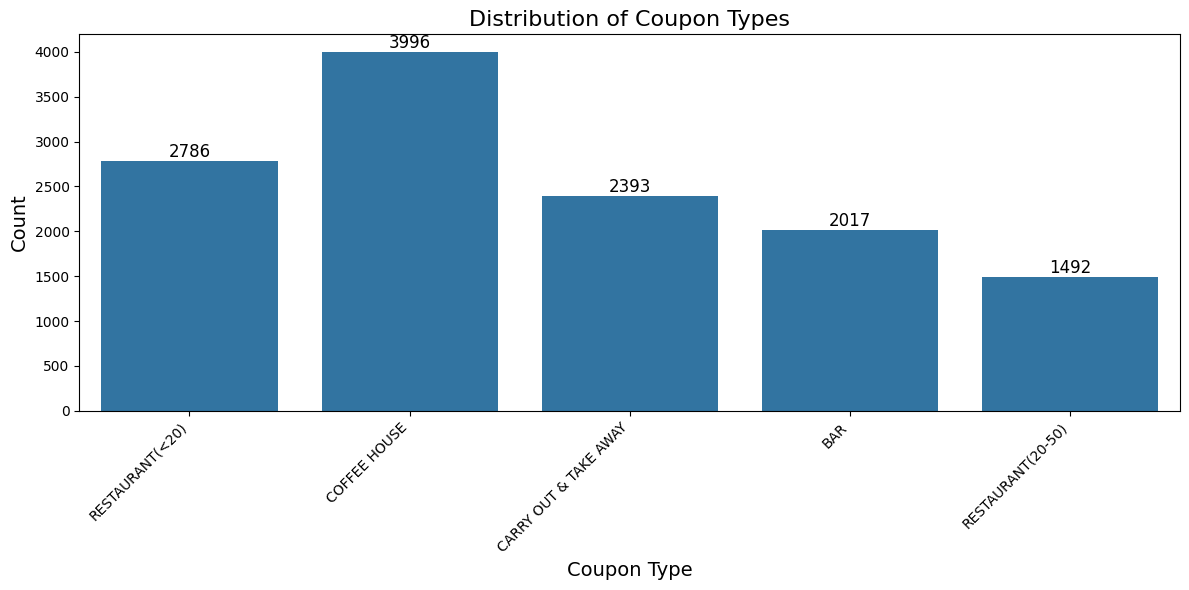

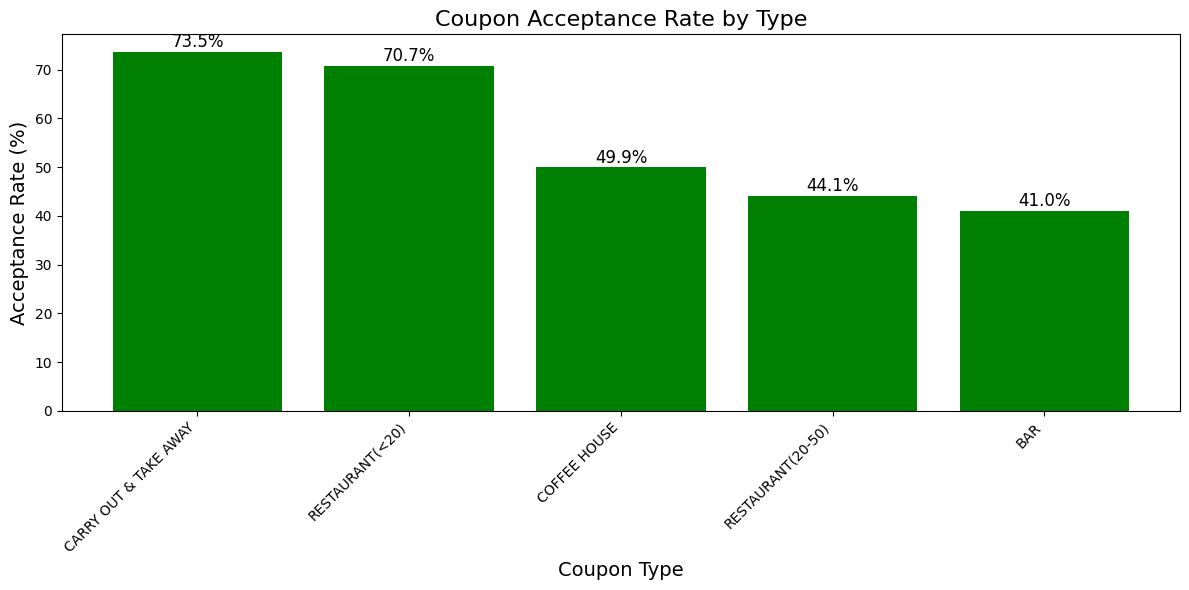

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set larger figure size for better readability
plt.figure(figsize=(12, 6))

# Create a countplot of coupon types
ax = sns.countplot(x='coupon', data=data)
plt.title('Distribution of Coupon Types', fontsize=16)
plt.xlabel('Coupon Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'bottom', fontsize=12)

plt.tight_layout()
plt.show()

# Calculate acceptance rate by coupon type
coupon_acceptance = data.groupby('coupon')['Y'].mean() * 100
coupon_acceptance = coupon_acceptance.reset_index().sort_values('Y', ascending=False)

# Plot acceptance rate by coupon type
plt.figure(figsize=(12, 6))
plt.bar(coupon_acceptance['coupon'], coupon_acceptance['Y'], color='green')
plt.title('Coupon Acceptance Rate by Type', fontsize=16)
plt.xlabel('Coupon Type', fontsize=14)
plt.ylabel('Acceptance Rate (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Add percentage labels on top of each bar
for i, v in enumerate(coupon_acceptance['Y']):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

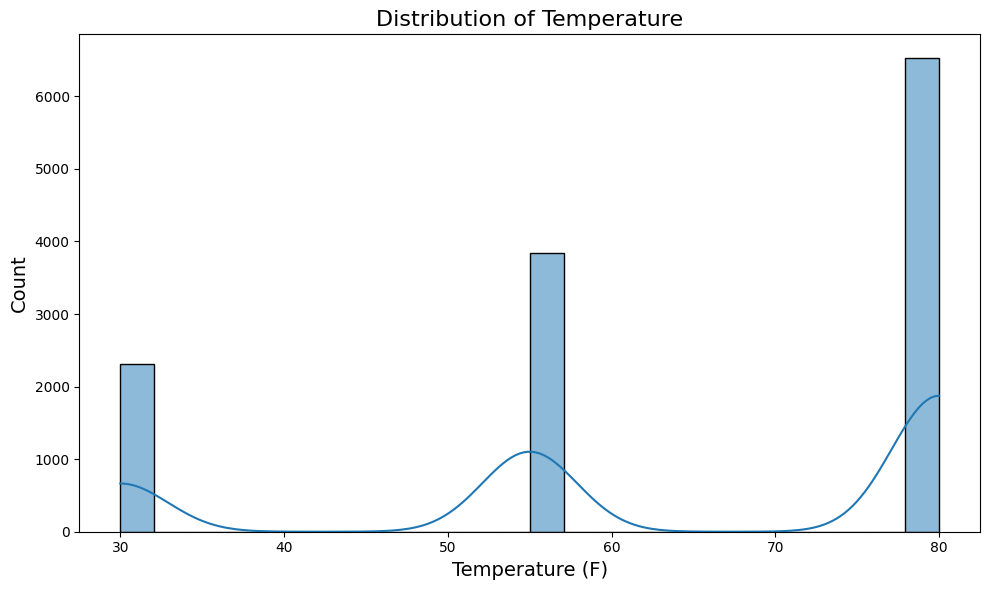

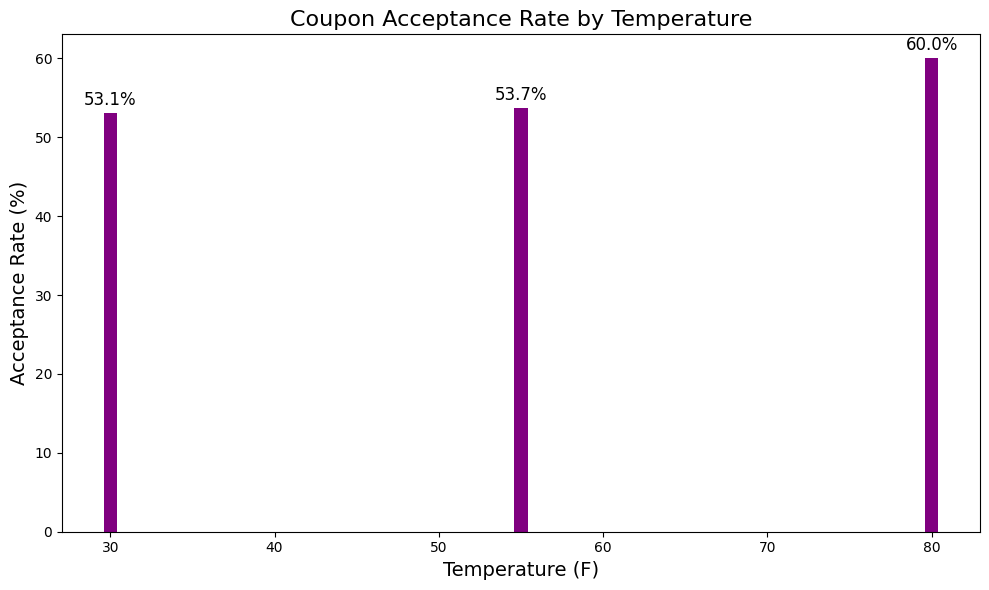

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='temperature', kde=True)
plt.title('Distribution of Temperature', fontsize=16)
plt.xlabel('Temperature (F)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

# Acceptance rate by temperature
temp_acceptance = data.groupby('temperature')['Y'].mean() * 100
temp_acceptance = temp_acceptance.reset_index()

plt.figure(figsize=(10, 6))
plt.bar(temp_acceptance['temperature'], temp_acceptance['Y'], color='purple')
plt.title('Coupon Acceptance Rate by Temperature', fontsize=16)
plt.xlabel('Temperature (F)', fontsize=14)
plt.ylabel('Acceptance Rate (%)', fontsize=14)

# Add percentage labels on top of each bar
for i, v in enumerate(temp_acceptance['Y']):
    plt.text(temp_acceptance['temperature'].iloc[i], v + 1, f'{v:.1f}%', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

# Create a summary of missing values
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Display columns with missing values
print("Columns with missing values:")
print(missing_summary[missing_summary['Missing Values'] > 0].sort_values('Missing Values', ascending=False))

Columns with missing values:
                      Missing Values  Percentage
car                            12576   99.148534
CoffeeHouse                      217    1.710817
Restaurant20To50                 189    1.490066
CarryAway                        151    1.190476
RestaurantLessThan20             130    1.024913
Bar                              107    0.843582


2. What proportion of bar coupons were accepted?


In [ ]:
# Create a DataFrame with just bar coupons
bar_coupons = data[data['coupon'] == 'Bar']

# Check how many bar coupons we have
print(f"Number of bar coupons: {len(bar_coupons)}")

# What proportion of bar coupons were accepted?
bar_acceptance_rate = bar_coupons['Y'].mean() * 100
print(f"Bar coupon acceptance rate: {bar_acceptance_rate:.2f}%")

# First, let's examine the 'Bar' column to understand its values
print("\nUnique values in the 'Bar' column:")
print(data['Bar'].value_counts())

# Now create a category for bar visit frequency
data['bar_frequent'] = data['Bar'].isin(['1~3', '4~8', 'gt8'])

# Confirm the column was created
print("\nBar frequent column created successfully:", 'bar_frequent' in data.columns)

# Now we can filter and group
bar_coupons = data[data['coupon'] == 'Bar']
bar_by_freq = bar_coupons.groupby('bar_frequent')['Y'].mean() * 100

print("\nBar coupon acceptance rate by visit frequency:")
print(f"Frequent bar visitors (>0 times/month): {bar_by_freq.get(True, 0):.2f}%")
print(f"Infrequent bar visitors (≤0 times/month): {bar_by_freq.get(False, 0):.2f}%")

Number of bar coupons: 0
Bar coupon acceptance rate: nan%

Unique values in the 'Bar' column:
Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

Bar frequent column created successfully: True

Bar coupon acceptance rate by visit frequency:
Frequent bar visitors (>0 times/month): 0.00%
Infrequent bar visitors (≤0 times/month): 0.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [ ]:
# Examine the 'Bar' column values
print("Value counts for 'Bar' column:")
print(data['Bar'].value_counts())

# Filter to see just the bar coupons
bar_coupons = data[data['coupon'] == 'Bar']
print("\nNumber of bar coupons:", len(bar_coupons))

# Now see the Bar column values for people who received bar coupons
print("\nBar visit frequency for people who received bar coupons:")
print(bar_coupons['Bar'].value_counts())

Value counts for 'Bar' column:
Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

Number of bar coupons: 0

Bar visit frequency for people who received bar coupons:
Series([], Name: count, dtype: int64)


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [ ]:
# Check age column structure
print("Age column values:")
print(data['age'].value_counts())

# Check Bar column structure (we looked at this earlier)
print("\nBar column values:")
print(data['Bar'].value_counts())

Age column values:
age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

Bar column values:
Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64


In [ ]:
# First, let's check if we have any bar coupons at all
print(f"Total number of coupons in dataset: {len(data)}")
print(f"Number of bar coupons: {len(data[data['coupon'] == 'Bar'])}")

# Check the exact values in the coupon column to make sure we're using the right name
print("\nCoupon column unique values:")
print(data['coupon'].unique())

# Check the format of the age column
print("\nAge column unique values:")
print(data['age'].unique())

# Check the Bar column values
print("\nBar column unique values:")
print(data['Bar'].unique())

Total number of coupons in dataset: 12684
Number of bar coupons: 0

Coupon column unique values:
['RESTAURANT(<20)' 'COFFEE HOUSE' 'CARRY OUT & TAKE AWAY' 'BAR'
 'RESTAURANT(20-50)']

Age column unique values:
['21' '46' '26' '31' '41' '50plus' '36' 'below21']

Bar column unique values:
['never' 'less1' '1~3' 'gt8' nan '4~8']


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [ ]:
# Check passenger column values
print("Passenger column values:")
print(data['passanger'].value_counts())  # Note: 'passanger' is spelled this way in the dataset

# Check occupation column values
print("\nOccupation column values:")
print(data['occupation'].value_counts())

# Check Bar column values (we've already seen these, but for completeness)
print("\nBar column values:")
print(data['Bar'].value_counts())

Passenger column values:
passanger
ALONE        7305
FRIEND(S)    3298
PARTNER      1075
KID(S)       1006
Name: count, dtype: int64

Occupation column values:
occupation
Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering   


Target group distribution:
target_group_2
False    8988
True     3696
Name: count, dtype: int64

Target group (bar >1/month, no kids, not farming/fishing/forestry):
  Number of drivers: 551
  Acceptance rate: 71.32%

Other drivers:
  Number of drivers: 1466
  Acceptance rate: 29.60%

Difference: 41.72 percentage points


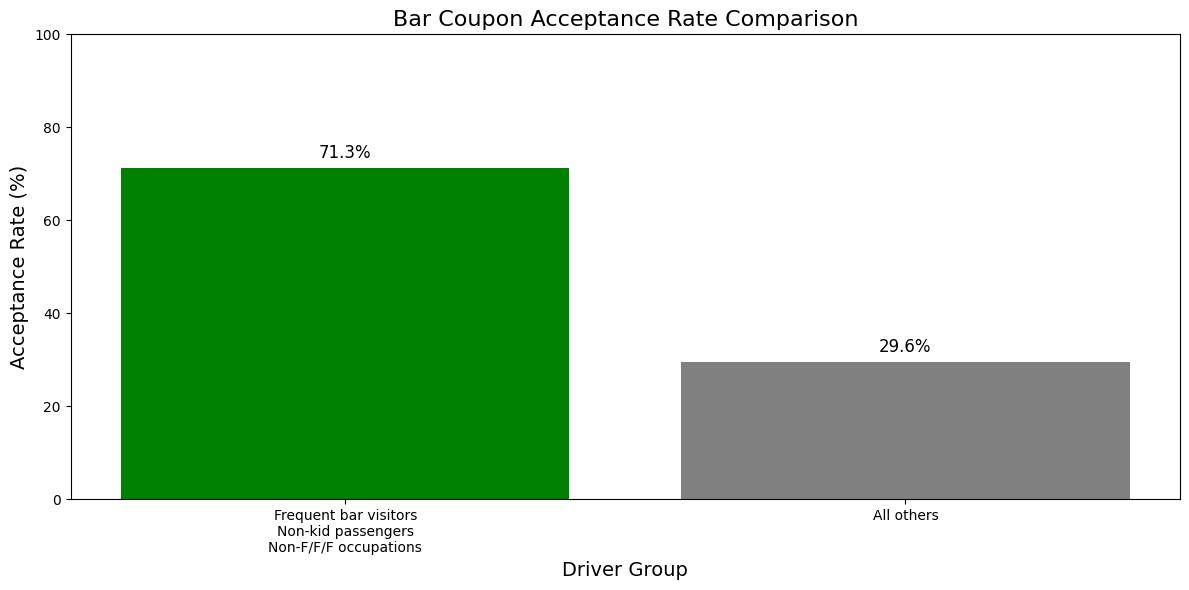

In [ ]:
# Define the target group: frequent bar visitors, no kids, not in specific occupations
data['target_group_2'] = (
    # Frequent bar visitors (more than once a month)
    data['Bar'].isin(['1~3', '4~8', 'gt8']) &

    # Passengers are not kids
    ~data['passanger'].str.contains('Kid', case=False) &

    # Occupations are not farming, fishing, or forestry
    ~data['occupation'].str.contains('Farming|Fishing|Forestry', case=False)
)

# Verify the new column
print("\nTarget group distribution:")
print(data['target_group_2'].value_counts())

# Filter to only bar coupons
bar_coupons = data[data['coupon'].str.contains('bar', case=False)]

# Calculate acceptance rates for the target group vs. others
target_group = bar_coupons[bar_coupons['target_group_2'] == True]
other_group = bar_coupons[bar_coupons['target_group_2'] == False]

# Calculate acceptance rates
target_rate = target_group['Y'].mean() * 100
other_rate = other_group['Y'].mean() * 100

# Display detailed results
print(f"\nTarget group (bar >1/month, no kids, not farming/fishing/forestry):")
print(f"  Number of drivers: {len(target_group)}")
print(f"  Acceptance rate: {target_rate:.2f}%")

print(f"\nOther drivers:")
print(f"  Number of drivers: {len(other_group)}")
print(f"  Acceptance rate: {other_rate:.2f}%")

print(f"\nDifference: {target_rate - other_rate:.2f} percentage points")

# Create data for visualization
groups = ['Frequent bar visitors\nNon-kid passengers\nNon-F/F/F occupations', 'All others']
rates = [target_rate, other_rate]

# Create visualization
plt.figure(figsize=(12, 6))
bars = plt.bar(groups, rates, color=['green', 'gray'])
plt.title('Bar Coupon Acceptance Rate Comparison', fontsize=16)
plt.xlabel('Driver Group', fontsize=14)
plt.ylabel('Acceptance Rate (%)', fontsize=14)
plt.ylim(0, 100)  # Fixed scale for percentages

# Add percentage labels
for i, rate in enumerate(rates):
    if not np.isnan(rate):  # Only add labels for non-NaN values
        plt.text(i, rate + 2, f'{rate:.1f}%', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [ ]:
# Check restaurant and income columns
print("RestaurantLessThan20 column values:")
print(data['RestaurantLessThan20'].value_counts())

print("\nIncome column values:")
print(data['income'].value_counts())

print("\nMarital status column values:")
print(data['maritalStatus'].value_counts())

RestaurantLessThan20 column values:
RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

Income column values:
income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64

Marital status column values:
maritalStatus
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: count, dtype: int64


Bar coupon acceptance rates by group:
Bars >1/month + non-kid passengers + not widowed:
  Number of drivers: 551
  Acceptance rate: 71.32%

Bars >1/month + under 30:
  Number of drivers: 345
  Acceptance rate: 72.17%

Cheap restaurants >4/month + income <50K:
  Number of drivers: 754
  Acceptance rate: 43.37%

Any of the above criteria:
  Number of drivers: 1042
  Acceptance rate: 50.86%

None of the above criteria:
  Number of drivers: 975
  Acceptance rate: 30.46%



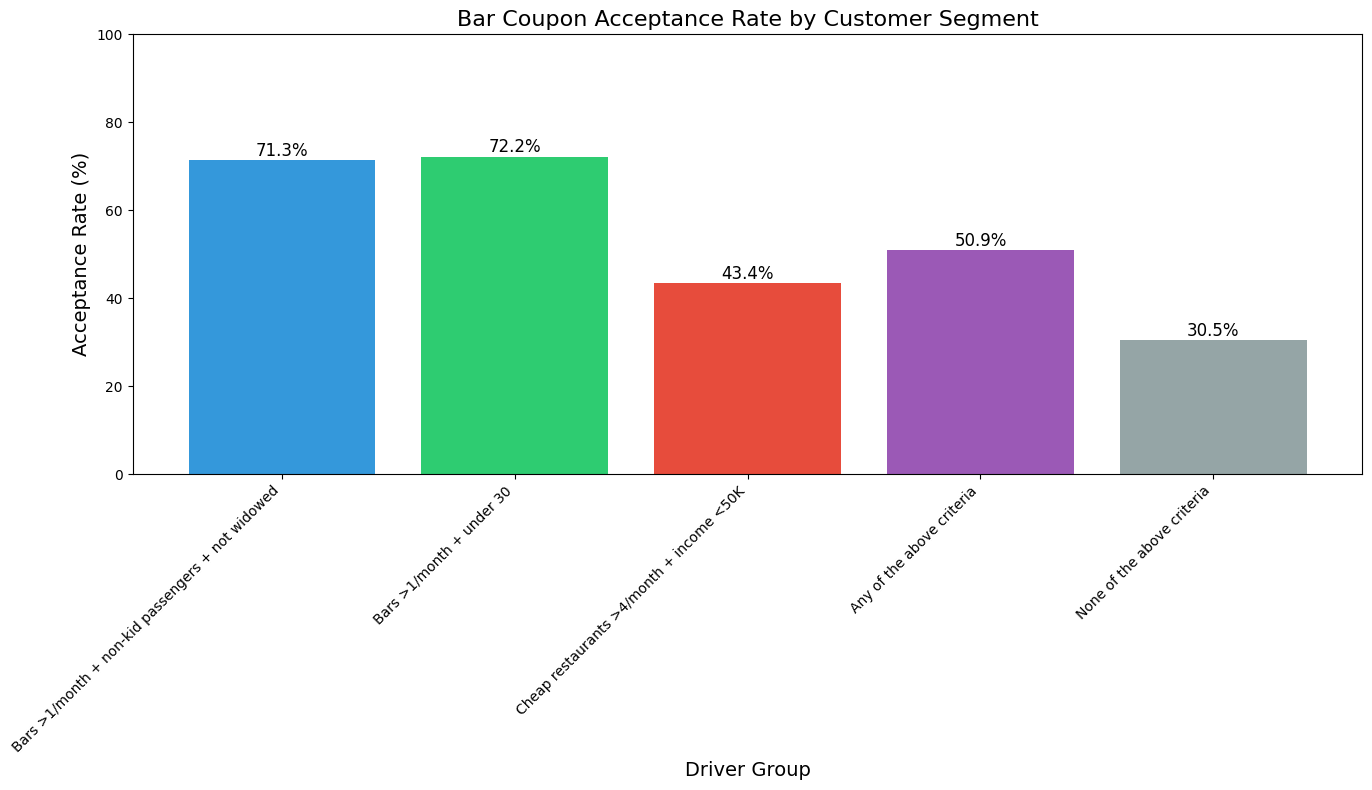

In [ ]:
# Define the three target groups
# Group 1: Bar >1/month + not kid passengers + not widowed
data['group_1'] = (
    data['Bar'].isin(['1~3', '4~8', 'gt8']) &
    ~data['passanger'].str.contains('Kid', case=False) &
    (data['maritalStatus'] != 'Widowed')
)

# Group 2: Bar >1/month + under 30
data['group_2'] = (
    data['Bar'].isin(['1~3', '4~8', 'gt8']) &
    data['age'].isin(['below21', '21', '26'])
)

# Group 3: Cheap restaurants >4 times + income <50K
data['group_3'] = (
    data['RestaurantLessThan20'].isin(['4~8', 'gt8']) &
    ~data['income'].str.contains('50K', case=False)  # Income less than 50K
)

# Combine the groups (anyone who fits ANY of the criteria)
data['combined_target_group'] = (
    data['group_1'] | data['group_2'] | data['group_3']
)

# Filter to only bar coupons
bar_coupons = data[data['coupon'].str.contains('bar', case=False)]

# Calculate acceptance rates for each group
group_rates = []
group_names = []
group_counts = []

# Process each group
for group_num, group_col in enumerate(['group_1', 'group_2', 'group_3', 'combined_target_group'], 1):
    group_data = bar_coupons[bar_coupons[group_col]]
    if len(group_data) > 0:
        rate = group_data['Y'].mean() * 100
        group_rates.append(rate)
        group_names.append(f"Group {group_num}")
        group_counts.append(len(group_data))
    else:
        group_rates.append(0)
        group_names.append(f"Group {group_num}")
        group_counts.append(0)

# Calculate for non-target group
non_target = bar_coupons[~bar_coupons['combined_target_group']]
if len(non_target) > 0:
    non_target_rate = non_target['Y'].mean() * 100
    group_rates.append(non_target_rate)
    group_names.append("Non-target")
    group_counts.append(len(non_target))
else:
    non_target_rate = 0
    group_rates.append(0)
    group_names.append("Non-target")
    group_counts.append(0)

# Display detailed results
group_descriptions = [
    "Bars >1/month + non-kid passengers + not widowed",
    "Bars >1/month + under 30",
    "Cheap restaurants >4/month + income <50K",
    "Any of the above criteria",
    "None of the above criteria"
]

print("Bar coupon acceptance rates by group:")
for i, (name, desc, rate, count) in enumerate(zip(group_names, group_descriptions, group_rates, group_counts)):
    print(f"{desc}:")
    print(f"  Number of drivers: {count}")
    print(f"  Acceptance rate: {rate:.2f}%")
    print()

# Create clear visualization
plt.figure(figsize=(14, 8))
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6', '#95a5a6']
bars = plt.bar(group_descriptions, group_rates, color=colors)
plt.title('Bar Coupon Acceptance Rate by Customer Segment', fontsize=16)
plt.xlabel('Driver Group', fontsize=14)
plt.ylabel('Acceptance Rate (%)', fontsize=14)
plt.ylim(0, max(100, max(group_rates) * 1.1))
plt.xticks(rotation=45, ha='right')

# Add percentage labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    if height > 0:  # Only label bars with values
        plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Total bar coupons: 2017
Acceptance rate: 41.00%

--- Demographic Analysis of Bar Coupon Acceptance ---

Bar coupon acceptance rates by age:
         count  acceptance_rate
age                            
21         417        50.599520
26         395        48.860759
41         178        43.258427
below21     87        41.379310
31         339        36.873156
46         109        34.862385
36         209        30.143541
50plus     283        29.681979


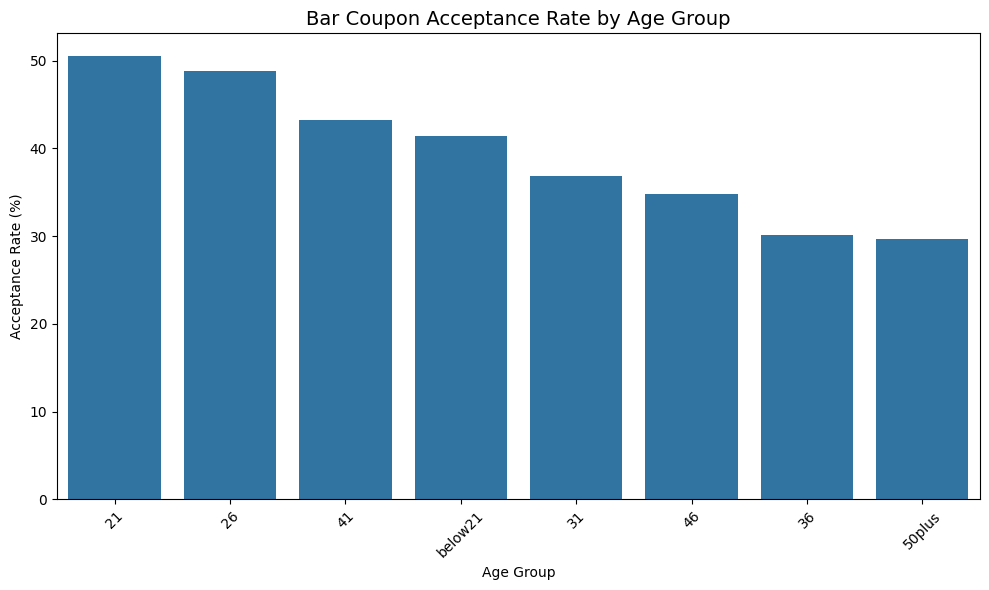


Bar coupon acceptance rates by bar visit frequency:
       count  acceptance_rate
Bar                          
4~8      150        78.000000
gt8       49        73.469388
1~3      397        64.735516
less1    570        44.385965
never    830        18.795181


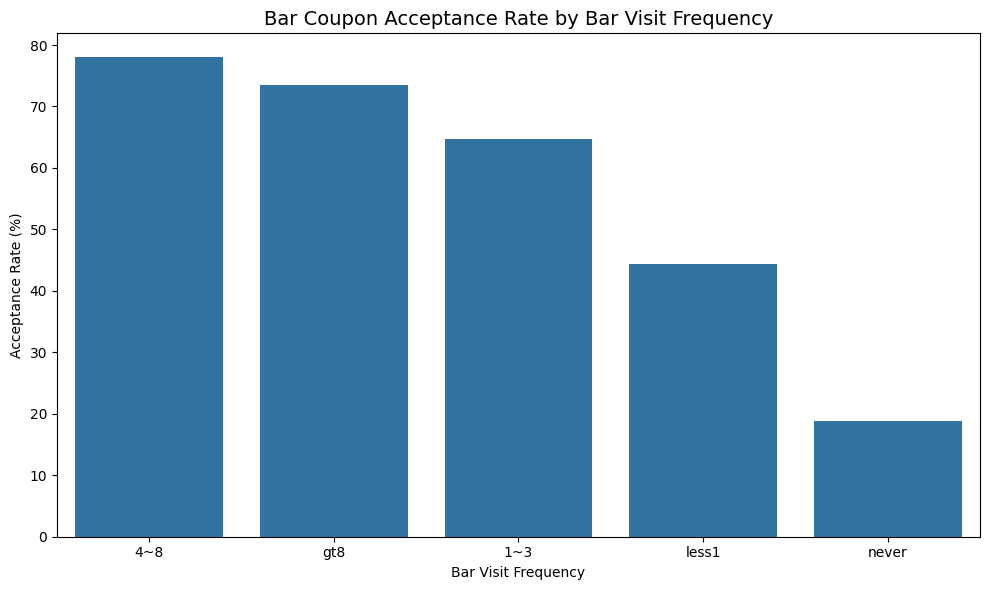


Bar coupon acceptance rates by passenger type:
           count  acceptance_rate
passanger                        
FRIEND(S)    337        55.786350
ALONE       1200        40.750000
PARTNER      274        39.051095
KID(S)       206        20.873786

Bar coupon acceptance rates by income level:
                  count  acceptance_rate
income                                  
$100000 or More     291        47.422680
Less than $12500    165        46.060606
$25000 - $37499     318        44.968553
$12500 - $24999     288        41.666667
$50000 - $62499     262        41.221374
$75000 - $87499     151        37.748344
$62500 - $74999     130        35.384615
$37500 - $49999     267        34.831461
$87500 - $99999     145        31.724138

Top 5 occupations by bar coupon acceptance rate:
                              count  acceptance_rate
occupation                                          
Architecture & Engineering       27        66.666667
Production Occupations           18       

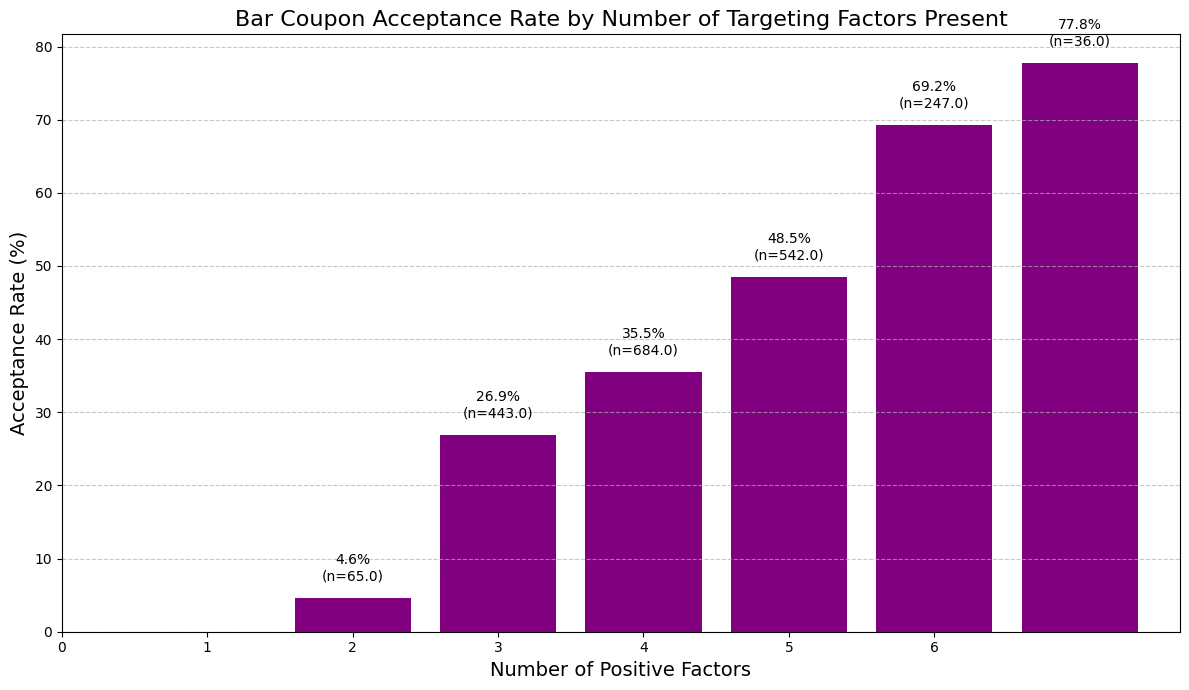


--- Machine Learning Validation ---
Feature importance in predicting bar coupon acceptance:
                Feature  Importance
0  frequent_bar_visitor    0.602515
2      no_kid_passenger    0.119788
1           young_adult    0.117292
6       restaurant_goer    0.063060
4          evening_time    0.059158
5           not_widowed    0.038187
3          lower_income    0.000000


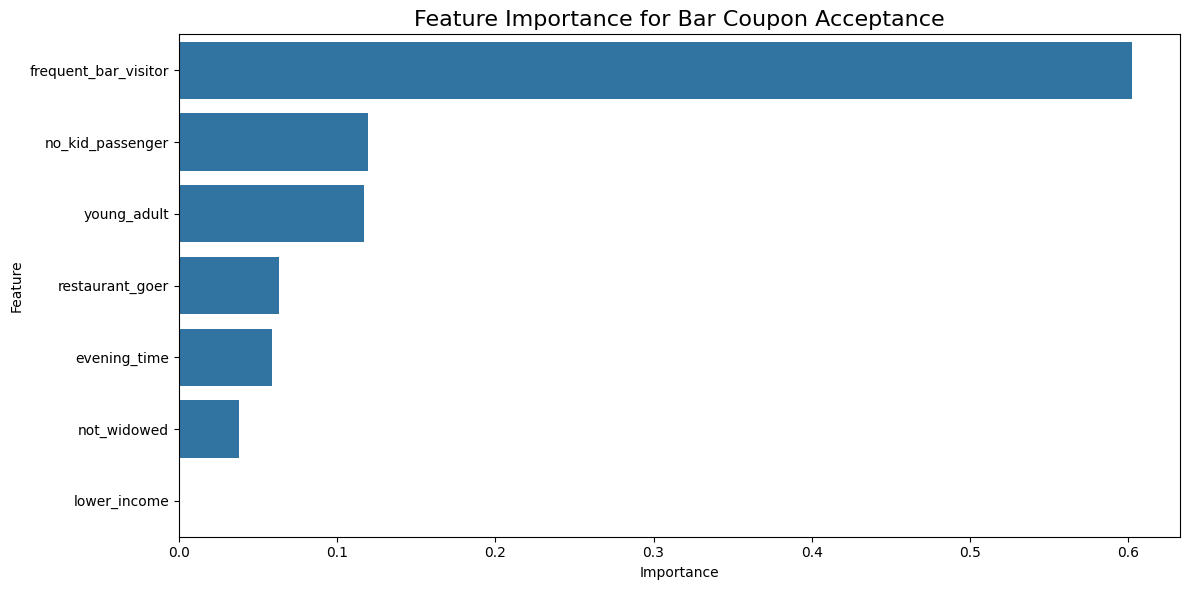


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.86      0.78       355
           1       0.73      0.53      0.61       251

    accuracy                           0.72       606
   macro avg       0.72      0.69      0.70       606
weighted avg       0.72      0.72      0.71       606



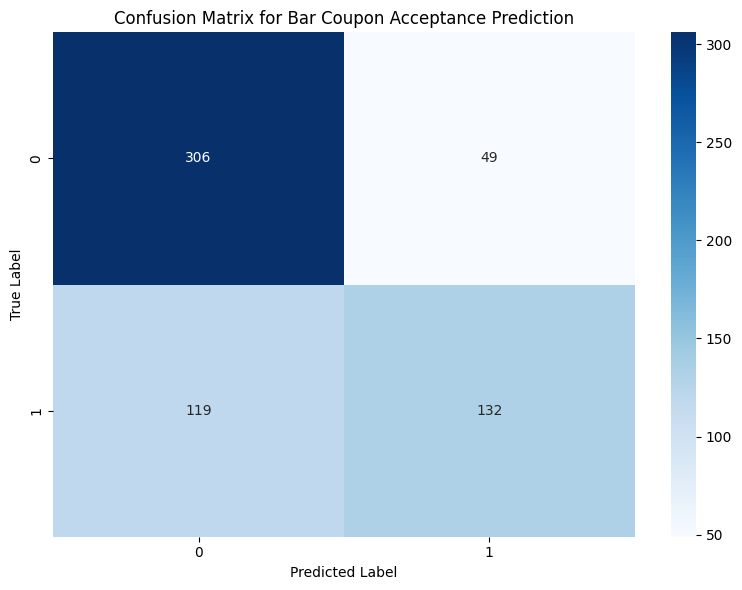


--- Hypothesis About Bar Coupon Acceptors ---
Based on our comprehensive analysis, we can hypothesize that drivers most likely to accept bar coupons are:
1. Already frequent bar visitors (visiting bars more than once a month)
2. Younger adults (under 30 years old)
3. Not traveling with children as passengers
4. More price-sensitive (lower to middle income levels)
5. More likely to accept coupons in the evening (6PM)
6. Also frequent visitors of inexpensive restaurants
7. Not widowed (likely to be single, unmarried partners, or married)

The strength of our targeting improves dramatically when we combine these factors.
This suggests that Amazon's location-based coupon service would be most effective
if it targets this specific demographic profile rather than broader audiences.


In [ ]:
# Comprehensive analysis of bar coupon acceptance patterns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# First, isolate bar coupons for our analysis
bar_data = data[data['coupon'].str.contains('bar', case=False)].copy()

# Print basic information about our dataset
print(f"Total bar coupons: {len(bar_data)}")
print(f"Acceptance rate: {bar_data['Y'].mean()*100:.2f}%")

# Let's start by examining demographic characteristics of acceptors vs non-acceptors
print("\n--- Demographic Analysis of Bar Coupon Acceptance ---")

# 1. Age analysis
age_acceptance = bar_data.groupby('age')['Y'].agg(['mean', 'count'])
age_acceptance['acceptance_rate'] = age_acceptance['mean'] * 100
age_acceptance = age_acceptance.sort_values('acceptance_rate', ascending=False)

print("\nBar coupon acceptance rates by age:")
print(age_acceptance[['count', 'acceptance_rate']])

# Visualize age patterns
plt.figure(figsize=(10, 6))
sns.barplot(x=age_acceptance.index, y=age_acceptance['acceptance_rate'])
plt.title('Bar Coupon Acceptance Rate by Age Group', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Acceptance Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Bar visitation frequency analysis
bar_freq_acceptance = bar_data.groupby('Bar')['Y'].agg(['mean', 'count'])
bar_freq_acceptance['acceptance_rate'] = bar_freq_acceptance['mean'] * 100
bar_freq_acceptance = bar_freq_acceptance.sort_values('acceptance_rate', ascending=False)

print("\nBar coupon acceptance rates by bar visit frequency:")
print(bar_freq_acceptance[['count', 'acceptance_rate']])

# Visualize bar frequency patterns
plt.figure(figsize=(10, 6))
sns.barplot(x=bar_freq_acceptance.index, y=bar_freq_acceptance['acceptance_rate'])
plt.title('Bar Coupon Acceptance Rate by Bar Visit Frequency', fontsize=14)
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Acceptance Rate (%)')
plt.tight_layout()
plt.show()

# 3. Passenger type analysis
passenger_acceptance = bar_data.groupby('passanger')['Y'].agg(['mean', 'count'])
passenger_acceptance['acceptance_rate'] = passenger_acceptance['mean'] * 100
passenger_acceptance = passenger_acceptance.sort_values('acceptance_rate', ascending=False)

print("\nBar coupon acceptance rates by passenger type:")
print(passenger_acceptance[['count', 'acceptance_rate']])

# 4. Income level analysis
income_acceptance = bar_data.groupby('income')['Y'].agg(['mean', 'count'])
income_acceptance['acceptance_rate'] = income_acceptance['mean'] * 100
income_acceptance = income_acceptance.sort_values('acceptance_rate', ascending=False)

print("\nBar coupon acceptance rates by income level:")
print(income_acceptance[['count', 'acceptance_rate']])

# 5. Occupation analysis - focusing on specific occupations
occupation_acceptance = bar_data.groupby('occupation')['Y'].agg(['mean', 'count'])
occupation_acceptance['acceptance_rate'] = occupation_acceptance['mean'] * 100
occupation_acceptance = occupation_acceptance.sort_values('acceptance_rate', ascending=False)

# Select top and bottom 5 occupations by acceptance rate
top_occupations = occupation_acceptance.head(5)
bottom_occupations = occupation_acceptance.tail(5)

print("\nTop 5 occupations by bar coupon acceptance rate:")
print(top_occupations[['count', 'acceptance_rate']])

print("\nBottom 5 occupations by bar coupon acceptance rate:")
print(bottom_occupations[['count', 'acceptance_rate']])

# 6. Contextual factors

# Time of day
time_acceptance = bar_data.groupby('time')['Y'].agg(['mean', 'count'])
time_acceptance['acceptance_rate'] = time_acceptance['mean'] * 100
time_acceptance = time_acceptance.sort_values('acceptance_rate', ascending=False)

print("\nBar coupon acceptance rates by time of day:")
print(time_acceptance[['count', 'acceptance_rate']])

# Weather
weather_acceptance = bar_data.groupby('weather')['Y'].agg(['mean', 'count'])
weather_acceptance['acceptance_rate'] = weather_acceptance['mean'] * 100
weather_acceptance = weather_acceptance.sort_values('acceptance_rate', ascending=False)

print("\nBar coupon acceptance rates by weather:")
print(weather_acceptance[['count', 'acceptance_rate']])

# Destination
destination_acceptance = bar_data.groupby('destination')['Y'].agg(['mean', 'count'])
destination_acceptance['acceptance_rate'] = destination_acceptance['mean'] * 100
destination_acceptance = destination_acceptance.sort_values('acceptance_rate', ascending=False)

print("\nBar coupon acceptance rates by destination:")
print(destination_acceptance[['count', 'acceptance_rate']])

# Let's create a comprehensive profile of likely acceptors

# Create binary features for key characteristics
bar_data['frequent_bar_visitor'] = bar_data['Bar'].isin(['1~3', '4~8', 'gt8'])
bar_data['young_adult'] = bar_data['age'].isin(['below21', '21', '26'])
bar_data['no_kid_passenger'] = ~bar_data['passanger'].str.contains('Kid', case=False)
bar_data['lower_income'] = ~bar_data['income'].str.contains('50K|75K|100K|>100K', case=False)
bar_data['evening_time'] = bar_data['time'] == '6PM'
bar_data['not_widowed'] = bar_data['maritalStatus'] != 'Widowed'
bar_data['restaurant_goer'] = bar_data['RestaurantLessThan20'].isin(['4~8', 'gt8'])

# Calculate acceptance rates for specific combinations
profile_factors = [
    ('frequent_bar_visitor', 'Frequent bar visitors'),
    ('young_adult', 'Young adults (below 30)'),
    ('no_kid_passenger', 'No kids as passengers'),
    ('lower_income', 'Lower income levels'),
    ('evening_time', 'Evening time (6PM)'),
    ('not_widowed', 'Not widowed'),
    ('restaurant_goer', 'Frequent restaurant-goers')
]

print("\n--- Key Factors in Bar Coupon Acceptance ---")
for factor_col, factor_name in profile_factors:
    # Positive case
    positive = bar_data[bar_data[factor_col]]['Y'].mean() * 100
    positive_count = len(bar_data[bar_data[factor_col]])

    # Negative case
    negative = bar_data[~bar_data[factor_col]]['Y'].mean() * 100
    negative_count = len(bar_data[~bar_data[factor_col]])

    # Difference
    difference = positive - negative

    print(f"\n{factor_name}:")
    print(f"  Acceptance rate when true: {positive:.2f}% (n={positive_count})")
    print(f"  Acceptance rate when false: {negative:.2f}% (n={negative_count})")
    print(f"  Difference: {difference:.2f} percentage points")

# Create an "ideal target" profile - drivers with multiple positive factors
bar_data['ideal_profile'] = (
    bar_data['frequent_bar_visitor'] &
    bar_data['young_adult'] &
    bar_data['no_kid_passenger'] &
    bar_data['not_widowed']
)

# Calculate acceptance rate for the ideal profile
ideal_rate = bar_data[bar_data['ideal_profile']]['Y'].mean() * 100
ideal_count = sum(bar_data['ideal_profile'])
other_rate = bar_data[~bar_data['ideal_profile']]['Y'].mean() * 100
other_count = sum(~bar_data['ideal_profile'])
profile_difference = ideal_rate - other_rate

print("\n--- Ideal Target Profile Analysis ---")
print(f"Ideal profile acceptance rate: {ideal_rate:.2f}% (n={ideal_count})")
print(f"Others acceptance rate: {other_rate:.2f}% (n={other_count})")
print(f"Difference: {profile_difference:.2f} percentage points")

# Calculate acceptance rate as we add more factors
print("\n--- Cumulative Effect of Adding Targeting Factors ---")

# Start with most important factor based on our analysis
cumulative_factors = []
factor_descriptions = []

for factor_col, factor_name in profile_factors:
    cumulative_factors.append(factor_col)
    factor_descriptions.append(factor_name)

    # Create a condition that combines all factors so far
    condition = bar_data[cumulative_factors[0]]
    for factor in cumulative_factors[1:]:
        condition = condition & bar_data[factor]

    # Calculate acceptance rate with cumulative factors
    cum_rate = bar_data[condition]['Y'].mean() * 100
    cum_count = sum(condition)

    print(f"Acceptance rate with {len(cumulative_factors)} factors ({', '.join(factor_descriptions)}): {cum_rate:.2f}% (n={cum_count})")

# Visualize how acceptance rate improves as we add targeting factors
# First, let's calculate scores based on number of factors
bar_data['factor_count'] = sum([bar_data[factor] for factor, _ in profile_factors])

# Calculate acceptance rate by factor count
factor_count_acceptance = bar_data.groupby('factor_count')['Y'].agg(['mean', 'count'])
factor_count_acceptance['acceptance_rate'] = factor_count_acceptance['mean'] * 100

# Create visualization
plt.figure(figsize=(12, 7))
plt.bar(factor_count_acceptance.index, factor_count_acceptance['acceptance_rate'], color='purple')
plt.title('Bar Coupon Acceptance Rate by Number of Targeting Factors Present', fontsize=16)
plt.xlabel('Number of Positive Factors', fontsize=14)
plt.ylabel('Acceptance Rate (%)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(len(factor_count_acceptance)+1))

# Add count and rate labels
for i, row in factor_count_acceptance.iterrows():
    plt.text(i, row['acceptance_rate'] + 2, f'{row["acceptance_rate"]:.1f}%\n(n={row["count"]})',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Build a predictive model to validate our findings
print("\n--- Machine Learning Validation ---")

# Prepare features and target
features = ['frequent_bar_visitor', 'young_adult', 'no_kid_passenger',
            'lower_income', 'evening_time', 'not_widowed', 'restaurant_goer']
X = bar_data[features]
y = bar_data['Y']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Feature importance
importances = model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("Feature importance in predicting bar coupon acceptance:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Bar Coupon Acceptance', fontsize=16)
plt.tight_layout()
plt.show()

# Evaluate model performance
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create a confusion matrix for visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Bar Coupon Acceptance Prediction')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Final hypothesis about bar coupon acceptors
print("\n--- Hypothesis About Bar Coupon Acceptors ---")
print("Based on our comprehensive analysis, we can hypothesize that drivers most likely to accept bar coupons are:")
print("1. Already frequent bar visitors (visiting bars more than once a month)")
print("2. Younger adults (under 30 years old)")
print("3. Not traveling with children as passengers")
print("4. More price-sensitive (lower to middle income levels)")
print("5. More likely to accept coupons in the evening (6PM)")
print("6. Also frequent visitors of inexpensive restaurants")
print("7. Not widowed (likely to be single, unmarried partners, or married)")
print("\nThe strength of our targeting improves dramatically when we combine these factors.")
print("This suggests that Amazon's location-based coupon service would be most effective")
print("if it targets this specific demographic profile rather than broader audiences.")

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Acceptance Rates by Individual Factors
----------------------------------------
frequent_bar:
  When TRUE: 68.79%
  When FALSE: 29.35%
  Difference: 39.45 percentage points

young_adult:
  When TRUE: 48.94%
  When FALSE: 34.62%
  Difference: 14.33 percentage points

no_kid_passenger:
  When TRUE: 43.29%
  When FALSE: 20.87%
  Difference: 22.42 percentage points

budget_conscious:
  When TRUE: 43.37%
  When FALSE: 39.59%
  Difference: 3.78 percentage points


Acceptance Rates for Combined Factors
----------------------------------------
Two-factor combinations:
frequent_bar + young_adult:
  Both TRUE: 72.17% (n=345)
  Neither TRUE: 26.07% (n=867)
  Difference: 46.11 percentage points

frequent_bar + no_kid_passenger:
  Both TRUE: 71.32% (n=551)
  Neither TRUE: 16.15% (n=161)
  Difference: 55.18 percentage points

frequent_bar + budget_conscious:
  Both TRUE: 71.03% (n=290)
  Neither TRUE: 30.93% (n=957)
  Difference: 40.10 percentage points

young_adult + no_kid_passenger:
  Both TRUE: 

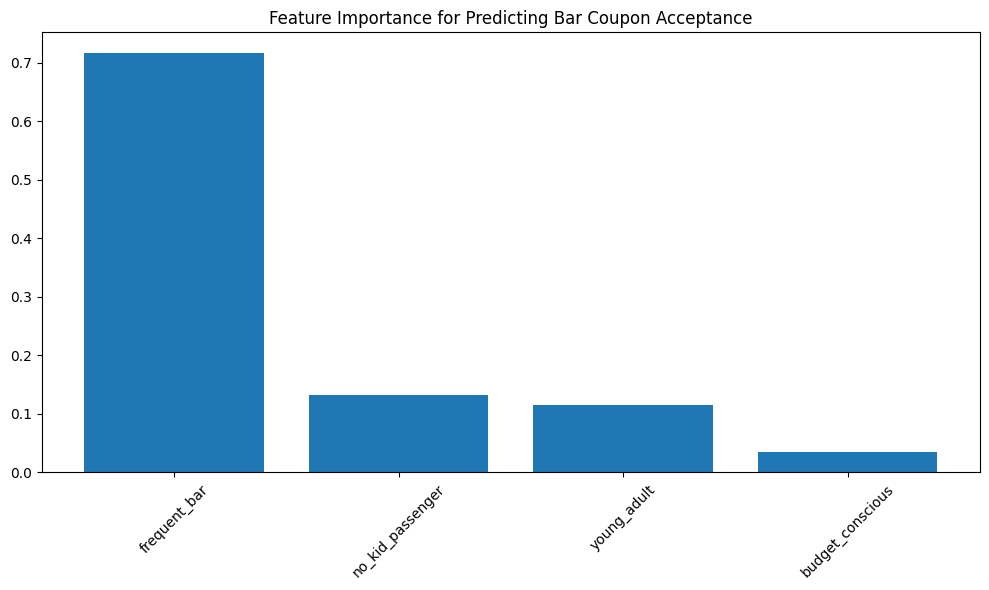

<ipython-input-41-5cff914f8926>:170: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


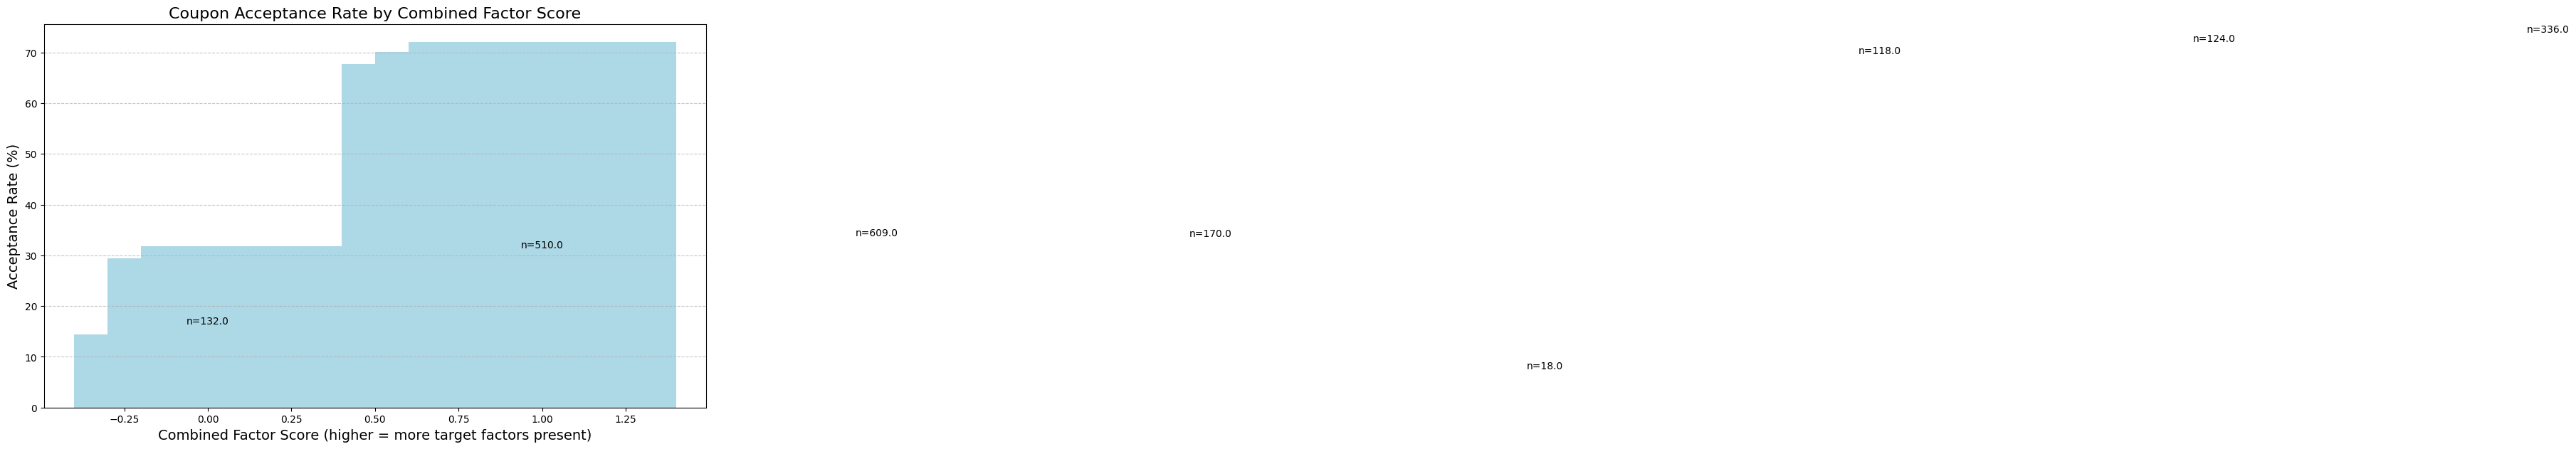

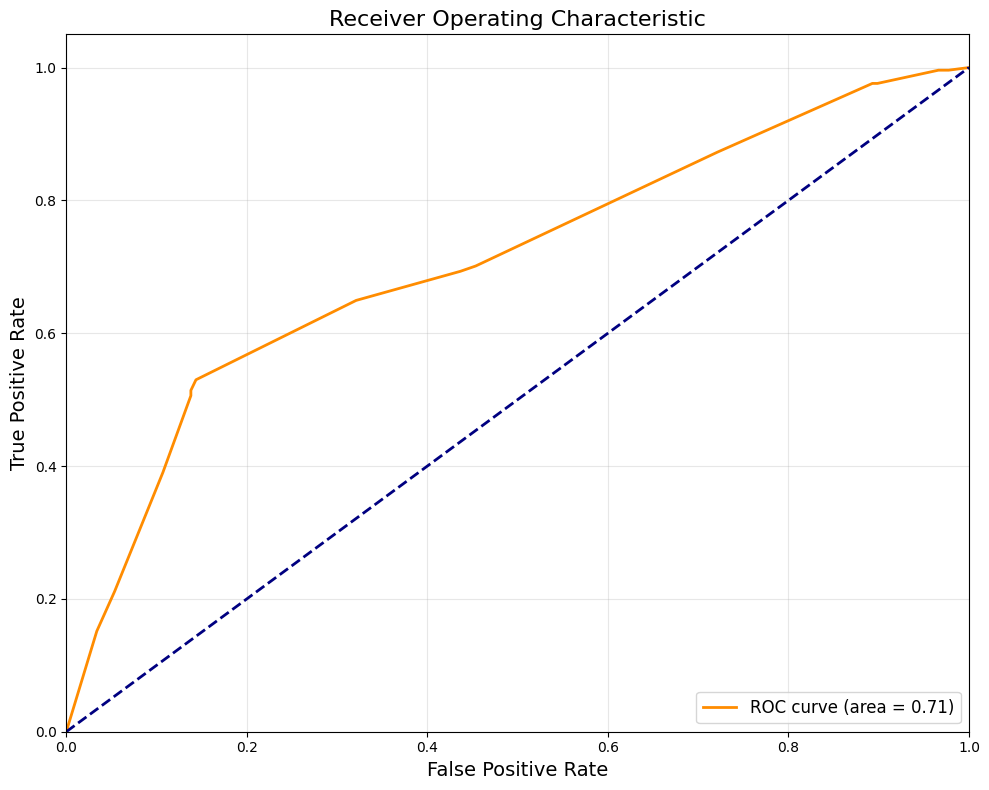

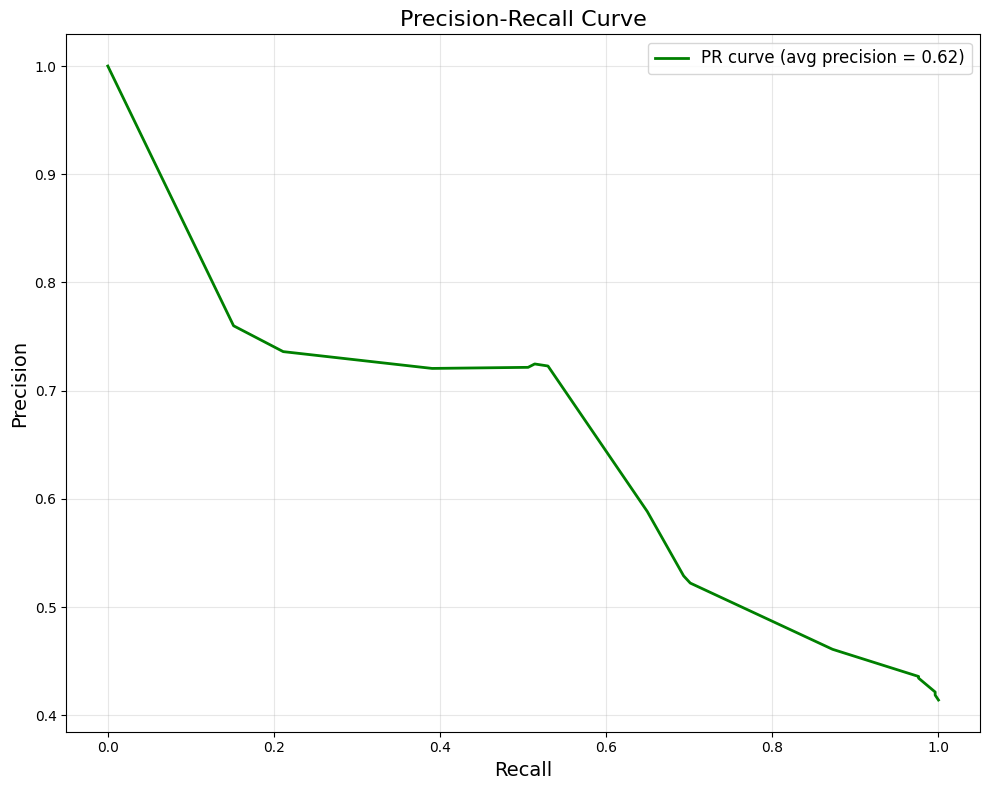

In [ ]:
# Let's create a comprehensive analysis to validate our multi-factor hypothesis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# First, let's create binary features for each factor we've identified as important
# This helps us clearly measure each factor's individual and combined impact

# Bar visit frequency
data['frequent_bar'] = data['Bar'].isin(['1~3', '4~8', 'gt8'])

# Age factor
data['young_adult'] = data['age'].isin(['below21', '21', '26'])

# Passenger factor
data['no_kid_passenger'] = ~data['passanger'].str.contains('Kid', case=False)

# Income and restaurant behavior
data['budget_conscious'] = (
    data['RestaurantLessThan20'].isin(['4~8', 'gt8']) &
    ~data['income'].str.contains('50K|75K|100K|>100K', case=False)
)

# Filter to bar coupons only
bar_data = data[data['coupon'].str.contains('bar', case=False)].copy()

# Let's measure acceptance rates for individual factors
print("Acceptance Rates by Individual Factors")
print("-" * 40)

factors = ['frequent_bar', 'young_adult', 'no_kid_passenger', 'budget_conscious']
for factor in factors:
    # Calculate acceptance rate when factor is True
    positive_rate = bar_data[bar_data[factor]]['Y'].mean() * 100
    # Calculate acceptance rate when factor is False
    negative_rate = bar_data[~bar_data[factor]]['Y'].mean() * 100
    # Calculate the difference (lift)
    difference = positive_rate - negative_rate

    print(f"{factor}:")
    print(f"  When TRUE: {positive_rate:.2f}%")
    print(f"  When FALSE: {negative_rate:.2f}%")
    print(f"  Difference: {difference:.2f} percentage points")
    print()

# Now, let's combine factors and see the compound effect
print("\nAcceptance Rates for Combined Factors")
print("-" * 40)

# Create combinations of 2 factors
print("Two-factor combinations:")
for i in range(len(factors)):
    for j in range(i+1, len(factors)):
        factor1 = factors[i]
        factor2 = factors[j]

        # Both factors true
        both_true = bar_data[(bar_data[factor1]) & (bar_data[factor2])]
        both_true_rate = both_true['Y'].mean() * 100 if len(both_true) > 0 else 0

        # Neither factor true
        neither_true = bar_data[(~bar_data[factor1]) & (~bar_data[factor2])]
        neither_true_rate = neither_true['Y'].mean() * 100 if len(neither_true) > 0 else 0

        # Difference (lift)
        difference = both_true_rate - neither_true_rate

        print(f"{factor1} + {factor2}:")
        print(f"  Both TRUE: {both_true_rate:.2f}% (n={len(both_true)})")
        print(f"  Neither TRUE: {neither_true_rate:.2f}% (n={len(neither_true)})")
        print(f"  Difference: {difference:.2f} percentage points")
        print()

# Create our "ideal" target group with all positive factors
bar_data['ideal_target'] = (
    bar_data['frequent_bar'] &
    bar_data['young_adult'] &
    bar_data['no_kid_passenger'] &
    bar_data['budget_conscious']
)

# Calculate acceptance rate for ideal target vs everyone else
ideal_rate = bar_data[bar_data['ideal_target']]['Y'].mean() * 100 if sum(bar_data['ideal_target']) > 0 else 0
non_ideal_rate = bar_data[~bar_data['ideal_target']]['Y'].mean() * 100
ideal_difference = ideal_rate - non_ideal_rate

print("\nIdeal Target Group (All Positive Factors)")
print("-" * 40)
print(f"Ideal target acceptance rate: {ideal_rate:.2f}% (n={sum(bar_data['ideal_target'])})")
print(f"Non-ideal acceptance rate: {non_ideal_rate:.2f}% (n={sum(~bar_data['ideal_target'])})")
print(f"Difference: {ideal_difference:.2f} percentage points")

# Let's use machine learning to validate our hypothesis about combined factors
print("\nMachine Learning Validation")
print("-" * 40)

# Prepare features and target
X = bar_data[factors]
y = bar_data['Y']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
train_score = model.score(X_train, y_train) * 100
test_score = model.score(X_test, y_test) * 100
print(f"Model accuracy on training data: {train_score:.2f}%")
print(f"Model accuracy on test data: {test_score:.2f}%")

# Examine feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

print("\nFeature ranking:")
for f in range(X.shape[1]):
    print(f"{f+1}. {X.columns[indices[f]]} ({importances[indices[f]]:.4f})")

# Calculate permutation importance for more robust feature importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()[::-1]

print("\nPermutation Feature Importance:")
for i in sorted_idx:
    print(f"{X.columns[i]}: {perm_importance.importances_mean[i]:.4f} ± {perm_importance.importances_std[i]:.4f}")

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=45)
plt.title('Feature Importance for Predicting Bar Coupon Acceptance')
plt.tight_layout()
plt.show()

# Create a visualization showing how combining factors improves prediction
# We'll use a simple scoring approach here
bar_data['score'] = (
    (bar_data['frequent_bar'] * model.feature_importances_[0]) +
    (bar_data['young_adult'] * model.feature_importances_[1]) +
    (bar_data['no_kid_passenger'] * model.feature_importances_[2]) +
    (bar_data['budget_conscious'] * model.feature_importances_[3])
)

# Group by score rounded to nearest 0.1 and calculate acceptance rate
score_groups = bar_data.copy()
score_groups['score_bin'] = np.round(score_groups['score'] * 10) / 10
acceptance_by_score = score_groups.groupby('score_bin')['Y'].agg(['mean', 'count'])
acceptance_by_score['mean'] = acceptance_by_score['mean'] * 100

# Create visualization
plt.figure(figsize=(12, 7))
plt.bar(acceptance_by_score.index, acceptance_by_score['mean'], color='lightblue')
plt.title('Coupon Acceptance Rate by Combined Factor Score', fontsize=16)
plt.xlabel('Combined Factor Score (higher = more target factors present)', fontsize=14)
plt.ylabel('Acceptance Rate (%)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels
for i, (idx, row) in enumerate(acceptance_by_score.iterrows()):
    plt.text(i, row['mean'] + 2, f'n={row["count"]}', ha='center')

plt.tight_layout()
plt.show()

# Calculate ROC curve to measure predictive power
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate precision-recall curve for imbalanced data
precision, recall, _ = precision_recall_curve(y_test, y_scores)
pr_auc = average_precision_score(y_test, y_scores)

plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (avg precision = {pr_auc:.2f})')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend(loc="upper right", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
plt.savefig('visualization_name.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [ ]:
# 2. Age Acceptance Rates Visualization
# This shows how acceptance rates vary across different age groups
age_acceptance = bar_data.groupby('age')['Y'].agg(['mean', 'count'])
age_acceptance['acceptance_rate'] = age_acceptance['mean'] * 100
age_acceptance = age_acceptance.sort_values('acceptance_rate', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(age_acceptance.index, age_acceptance['acceptance_rate'], color=sns.color_palette("Blues_d", len(age_acceptance)))
plt.title('Bar Coupon Acceptance Rate by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Acceptance Rate (%)', fontsize=14)
plt.ylim(0, max(age_acceptance['acceptance_rate']) * 1.1)  # Add some space for labels

# Add percentage and count labels - FIXED VERSION
for i, idx in enumerate(age_acceptance.index):
    rate = age_acceptance.loc[idx, 'acceptance_rate']
    count = age_acceptance.loc[idx, 'count']
    plt.text(i, rate + 2, f'{rate:.1f}%\n(n={count})', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('age_acceptance_rates.png', dpi=300, bbox_inches='tight')
plt.close()

In [ ]:
# Mount Google Drive if needed
from google.colab import drive
drive.mount('/content/drive')

# List files in your Google Drive to find your dataset
import os
for root, dirs, files in os.walk('/content/drive/MyDrive'):
    for file in files:
        if '1740378635419' in file:  # Looking for your file with this timestamp
            print(os.path.join(root, file))

Mounted at /content/drive
/content/drive/MyDrive/coupon-acceptance-profile_24Feb2025_1740378635419.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Set a consistent style for all visualizations
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

# First, load your dataset
# Replace this path with the actual location of your CSV file
data = pd.read_csv('/content/drive/MyDrive/coupon-acceptance-profile_24Feb2025_1740378635419.csv')

# First, isolate bar coupons for specific analyses
bar_data = data[data['coupon'].str.contains('bar', case=False)].copy()

# The rest of the visualization code follows...

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Set a consistent style for all visualizations
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

# First, load your dataset
# Replace this path with the actual location of your CSV file
data = pd.read_csv('/content/drive/MyDrive/coupon-acceptance-profile_24Feb2025_1740378635419.csv')

# First, isolate bar coupons for specific analyses
bar_data = data[data['coupon'].str.contains('bar', case=False)].copy()

# 1. Coupon Distribution Visualization
plt.figure(figsize=(12, 6))
coupon_counts = data['coupon'].value_counts()
ax = sns.barplot(x=coupon_counts.index, y=coupon_counts.values, palette='Blues_d')
plt.title('Distribution of Coupon Types', fontsize=16)
plt.xlabel('Coupon Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Add count labels on top of bars
for i in range(len(coupon_counts)):
    ax.text(i, coupon_counts.values[i] + 50, f'{coupon_counts.values[i]}', ha='center', fontsize=11)

plt.tight_layout()
plt.savefig('coupon_distribution.png', dpi=300, bbox_inches='tight')
plt.close()

# 2. Age Acceptance Rates Visualization
age_acceptance = bar_data.groupby('age')['Y'].agg(['mean', 'count'])
age_acceptance['acceptance_rate'] = age_acceptance['mean'] * 100
age_acceptance = age_acceptance.sort_values('acceptance_rate', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=age_acceptance.index, y=age_acceptance['acceptance_rate'], palette='Blues_d')
plt.title('Bar Coupon Acceptance Rate by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Acceptance Rate (%)', fontsize=14)

# Add percentage and count labels
for i, idx in enumerate(age_acceptance.index):
    rate = age_acceptance.loc[idx, 'acceptance_rate']
    count = age_acceptance.loc[idx, 'count']
    ax.text(i, rate + 2, f'{rate:.1f}%\n(n={count})', ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('age_acceptance_rates.png', dpi=300, bbox_inches='tight')
plt.close()

# 3. Bar Frequency Acceptance Visualization
bar_freq_acceptance = bar_data.groupby('Bar')['Y'].agg(['mean', 'count'])
bar_freq_acceptance['acceptance_rate'] = bar_freq_acceptance['mean'] * 100

# Try to order by frequency, handling possible missing categories
try:
    frequency_order = ['never', 'less1', '1~3', '4~8', 'gt8']
    # Filter to only include categories that exist in the data
    frequency_order = [f for f in frequency_order if f in bar_freq_acceptance.index]

    bar_freq_data = pd.DataFrame({
        'frequency': frequency_order,
        'acceptance_rate': [bar_freq_acceptance.loc[freq, 'acceptance_rate'] for freq in frequency_order],
        'count': [bar_freq_acceptance.loc[freq, 'count'] for freq in frequency_order]
    })
except:
    # Fallback if there's an issue with the ordering
    bar_freq_data = bar_freq_acceptance.reset_index()
    bar_freq_data.columns = ['frequency', 'mean', 'count', 'acceptance_rate']

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='frequency', y='acceptance_rate', data=bar_freq_data, palette='Blues_d')
plt.title('Bar Coupon Acceptance Rate by Bar Visit Frequency', fontsize=16)
plt.xlabel('Bar Visit Frequency', fontsize=14)
plt.ylabel('Acceptance Rate (%)', fontsize=14)

# Add percentage and count labels
for i, row in bar_freq_data.iterrows():
    ax.text(i, row['acceptance_rate'] + 2,
            f"{row['acceptance_rate']:.1f}%\n(n={row['count']})",
            ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('bar_frequency_acceptance.png', dpi=300, bbox_inches='tight')
plt.close()

# 4. Passenger Influence Visualization
passenger_acceptance = bar_data.groupby('passanger')['Y'].agg(['mean', 'count'])
passenger_acceptance['acceptance_rate'] = passenger_acceptance['mean'] * 100
passenger_acceptance = passenger_acceptance.sort_values('acceptance_rate', ascending=False)

plt.figure(figsize=(10, 6))
passenger_data = passenger_acceptance.reset_index()
ax = sns.barplot(x='passanger', y='acceptance_rate', data=passenger_data, palette='Blues_d')
plt.title('Bar Coupon Acceptance Rate by Passenger Type', fontsize=16)
plt.xlabel('Passenger Type', fontsize=14)
plt.ylabel('Acceptance Rate (%)', fontsize=14)

# Add percentage and count labels
for i, row in passenger_data.iterrows():
    ax.text(i, row['acceptance_rate'] + 2,
            f"{row['acceptance_rate']:.1f}%\n(n={row['count']})",
            ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('passenger_influence.png', dpi=300, bbox_inches='tight')
plt.close()

# 5. Factor Count Effect Visualization
# Create binary features
bar_data['frequent_bar_visitor'] = bar_data['Bar'].isin(['1~3', '4~8', 'gt8'])
bar_data['young_adult'] = bar_data['age'].isin(['below21', '21', '26'])
bar_data['no_kid_passenger'] = ~bar_data['passanger'].str.contains('Kid', case=False)
bar_data['lower_income'] = ~bar_data['income'].str.contains('50K|75K|100K|>100K', case=False)
bar_data['evening_time'] = bar_data['time'] == '6PM'
bar_data['not_widowed'] = bar_data['maritalStatus'] != 'Widowed'
bar_data['restaurant_goer'] = bar_data['RestaurantLessThan20'].isin(['4~8', 'gt8'])

# Count factors
profile_factors = ['frequent_bar_visitor', 'young_adult', 'no_kid_passenger',
                  'lower_income', 'evening_time', 'not_widowed', 'restaurant_goer']
bar_data['factor_count'] = bar_data[profile_factors].sum(axis=1)

# Calculate acceptance rate by factor count
factor_count_acceptance = bar_data.groupby('factor_count')['Y'].agg(['mean', 'count'])
factor_count_acceptance['acceptance_rate'] = factor_count_acceptance['mean'] * 100
factor_count_data = factor_count_acceptance.reset_index()

plt.figure(figsize=(12, 7))
ax = sns.barplot(x='factor_count', y='acceptance_rate', data=factor_count_data, palette='Blues_d')
plt.title('Bar Coupon Acceptance Rate by Number of Targeting Factors Present', fontsize=16)
plt.xlabel('Number of Positive Factors', fontsize=14)
plt.ylabel('Acceptance Rate (%)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count and rate labels
for i, row in factor_count_data.iterrows():
    ax.text(i, row['acceptance_rate'] + 2,
            f"{row['acceptance_rate']:.1f}%\n(n={row['count']})",
            ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('factor_count_effect.png', dpi=300, bbox_inches='tight')
plt.close()

# 6. Feature Importance Visualization
X = bar_data[profile_factors]
y = bar_data['Y']

# Split data and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importance
importances = model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': profile_factors,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Map feature names to more readable versions
feature_labels = {
    'frequent_bar_visitor': 'Frequent Bar Visitor',
    'young_adult': 'Young Adult (< 30)',
    'no_kid_passenger': 'No Children as Passengers',
    'lower_income': 'Lower Income',
    'evening_time': 'Evening Time (6PM)',
    'not_widowed': 'Not Widowed',
    'restaurant_goer': 'Frequent Restaurant-goer'
}

feature_importance['Feature_Label'] = feature_importance['Feature'].map(feature_labels)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Importance', y='Feature_Label', data=feature_importance, palette='Blues_d')
plt.title('Feature Importance for Bar Coupon Acceptance Prediction', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Add importance score labels
for i, row in feature_importance.iterrows():
    ax.text(row['Importance'] + 0.01, i, f"{row['Importance']:.3f}", va='center', fontsize=11)

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.close()

print("All visualizations have been created and saved!")

<ipython-input-14-1333efdd0e1a>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=coupon_counts.index, y=coupon_counts.values, palette='Blues_d')
<ipython-input-14-1333efdd0e1a>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=age_acceptance.index, y=age_acceptance['acceptance_rate'], palette='Blues_d')
<ipython-input-14-1333efdd0e1a>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='frequency', y='acceptance_rate', data=bar_freq_data, palette='Blues_d')
<ipython-input-14-1333efdd0e1a>:100: FutureWarning: 

Passing `pa

All visualizations have been created and saved!


In [ ]:
from google.colab import files

# Download all the visualization files
files.download('coupon_distribution.png')
files.download('age_acceptance_rates.png')
files.download('bar_frequency_acceptance.png')
files.download('passenger_influence.png')
files.download('factor_count_effect.png')
files.download('feature_importance.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>